In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                'marital_status', 'occupatio', 'relationship', 'race', 
                'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                'native_country', 'income']
data = pd.read_csv('adult.csv', names=column_names, na_values='?')

# Data Preprocessing

In [3]:
# Data cleaning
data = data.dropna()
data = data.drop_duplicates()

In [4]:
# Convert categorical variables to numerical
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'native_country', 'income']
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


In [5]:
# Split into features and target
X = data.drop('income', axis=1)
y = data['income']

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis

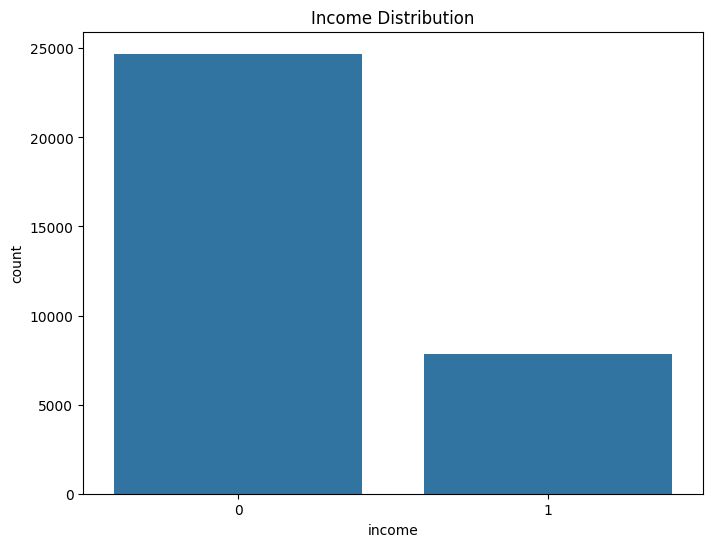

In [8]:
# Income distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.show()

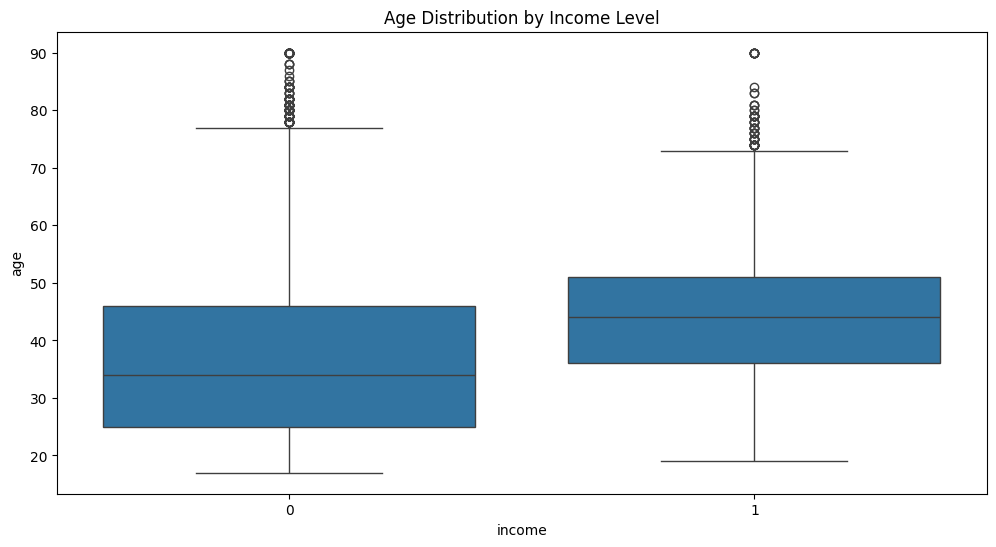

In [9]:
# Age distribution by income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Age Distribution by Income Level')
plt.show()

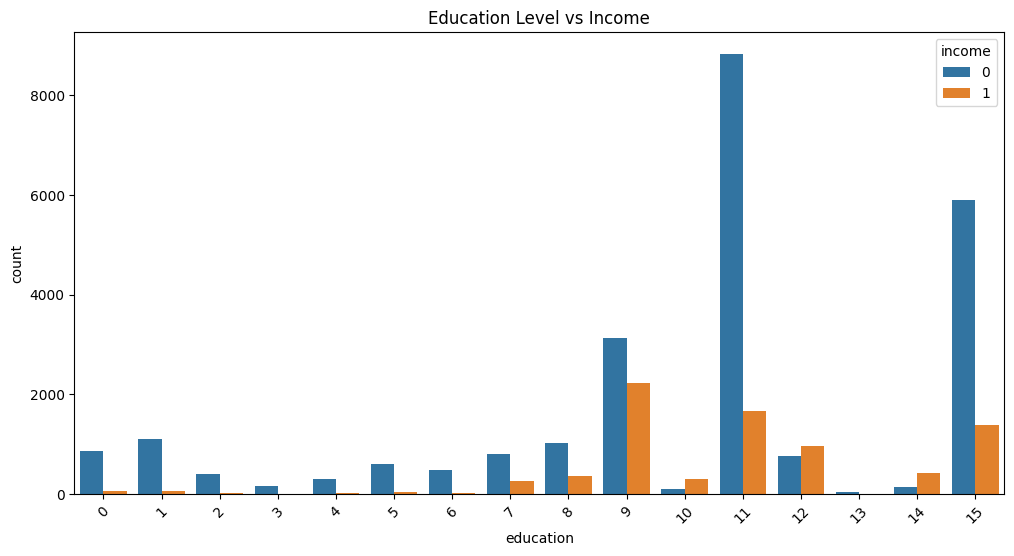

In [10]:
# Education vs Income
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='income', data=data)
plt.title('Education Level vs Income')
plt.xticks(rotation=45)
plt.show()

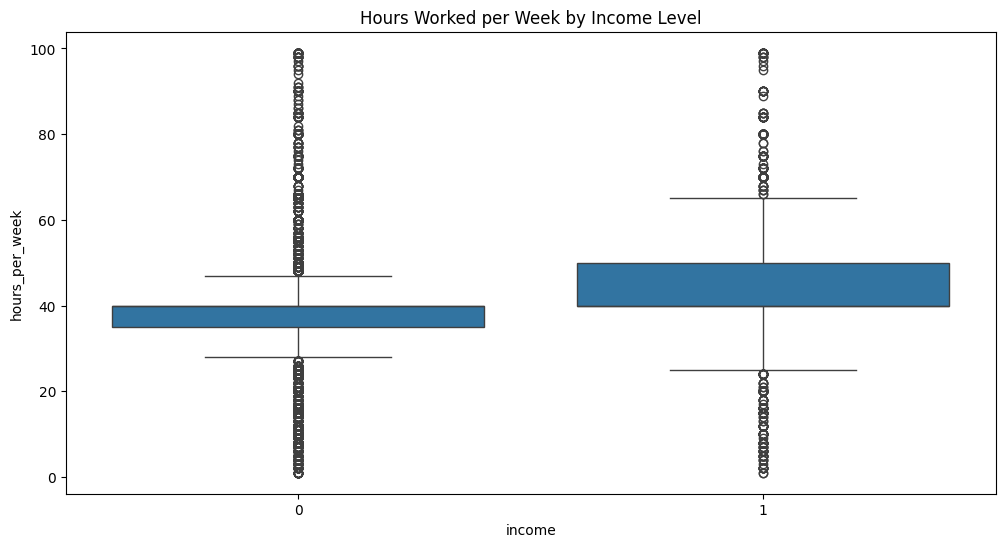

In [11]:
# Hours per week vs Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours_per_week', data=data)
plt.title('Hours Worked per Week by Income Level')
plt.show()

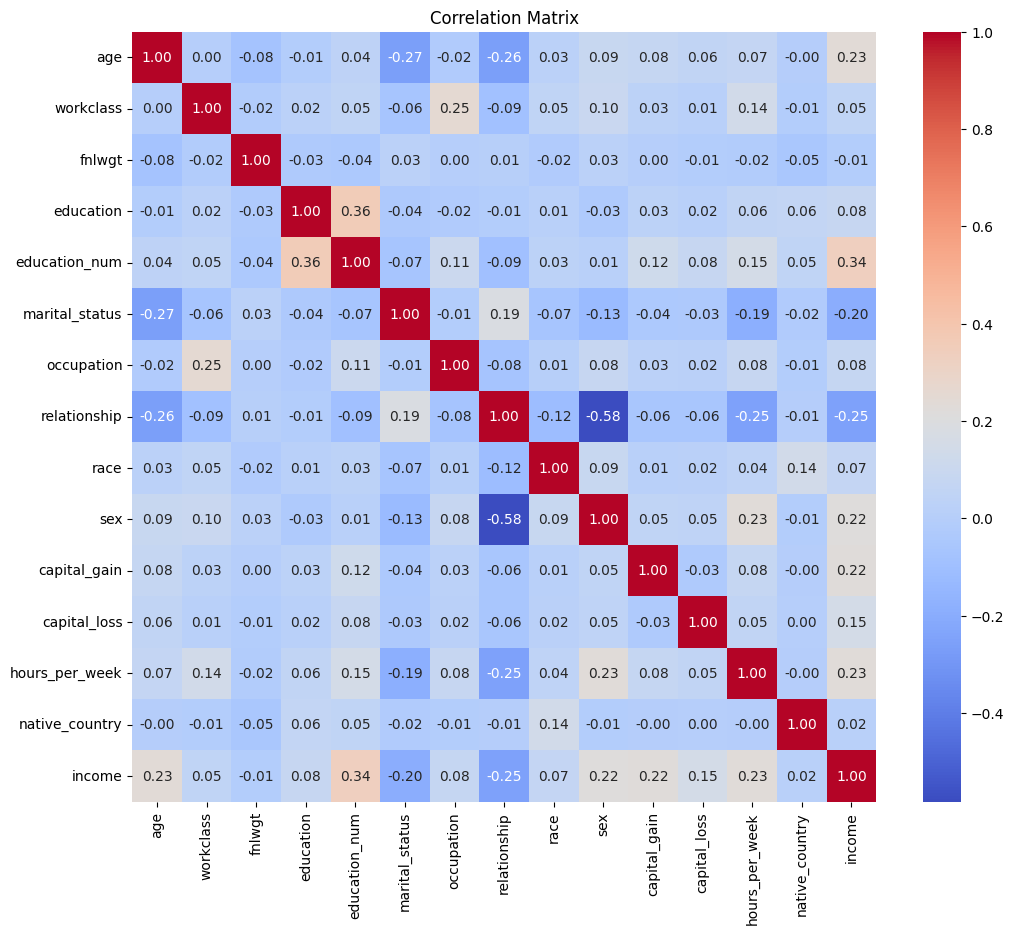

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feedforward Neural Network without Regularization

In [13]:
# Build the model
model_no_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history_no_reg = model_no_reg.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.8093 - loss: 0.4063 - val_accuracy: 0.8474 - val_loss: 0.3325
Epoch 2/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8431 - loss: 0.3319 - val_accuracy: 0.8465 - val_loss: 0.3298
Epoch 3/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.8502 - loss: 0.3228 - val_accuracy: 0.8494 - val_loss: 0.3265
Epoch 4/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.8508 - loss: 0.3172 - val_accuracy: 0.8488 - val_loss: 0.3265
Epoch 5/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8482 - loss: 0.3156 - val_accuracy: 0.8503 - val_loss: 0.3247
Epoch 6/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.8508 - loss: 0.3133 - val_accuracy: 0.8477 - val_loss: 0.3250
Epoch 7/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8557 - loss: 0.3060 - val_accuracy: 0.8449 - val_loss: 0.3271
Epoch 8/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.8532 - loss: 0

In [15]:
# Evaluate
y_pred = (model_no_reg.predict(X_test) > 0.5).astype(int)
print("Without Regularization:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Without Regularization:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7405
           1       0.72      0.62      0.67      2357

    accuracy                           0.85      9762
   macro avg       0.80      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762

Accuracy: 0.8505429215324729
Confusion Matrix:
 [[6838  567]
 [ 892 1465]]


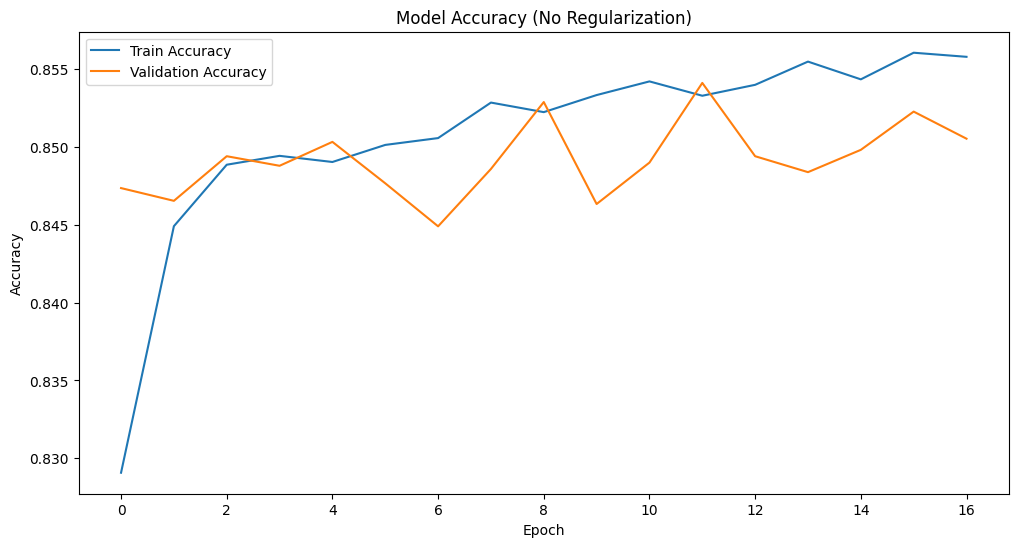

In [16]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history_no_reg.history['accuracy'], label='Train Accuracy')
plt.plot(history_no_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (No Regularization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Feedforward Neural Network with Regularization

In [17]:
# Build the model with L2 regularization
model_with_reg = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), 
           kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_with_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Sastra\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
history_with_reg = model_with_reg.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7471 - loss: 0.8546 - val_accuracy: 0.8335 - val_loss: 0.4190
Epoch 2/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8330 - loss: 0.4173 - val_accuracy: 0.8437 - val_loss: 0.3832
Epoch 3/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.8415 - loss: 0.3887 - val_accuracy: 0.8465 - val_loss: 0.3752
Epoch 4/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.8318 - loss: 0.3849 - val_accuracy: 0.8461 - val_loss: 0.3770
Epoch 5/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.8338 - loss: 0.3844 - val_accuracy: 0.8440 - val_loss: 0.3700
Epoch 6/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8369 - loss: 0.3817 - val_accuracy: 0.8465 - val_loss: 0.3653
Epoch 7/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.8383 - loss: 0.3781 - val_accuracy: 0.8433 - val_loss: 0.3659
Epoch 8/100
712/712 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.8378 - loss: 0.3

In [19]:
# Evaluate
y_pred_reg = (model_with_reg.predict(X_test) > 0.5).astype(int)
print("With Regularization:")
print(classification_report(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_reg))

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
With Regularization:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7405
           1       0.73      0.57      0.64      2357

    accuracy                           0.84      9762
   macro avg       0.80      0.75      0.77      9762
weighted avg       0.84      0.84      0.84      9762

Accuracy: 0.8449088301577545
Confusion Matrix:
 [[6904  501]
 [1013 1344]]


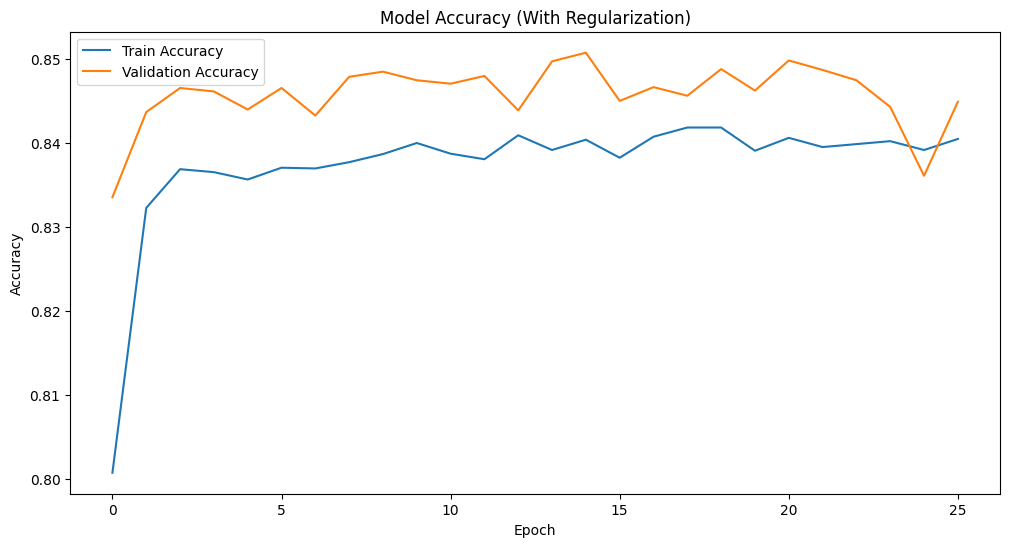

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history_with_reg.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_reg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Regularization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Comparison of Results

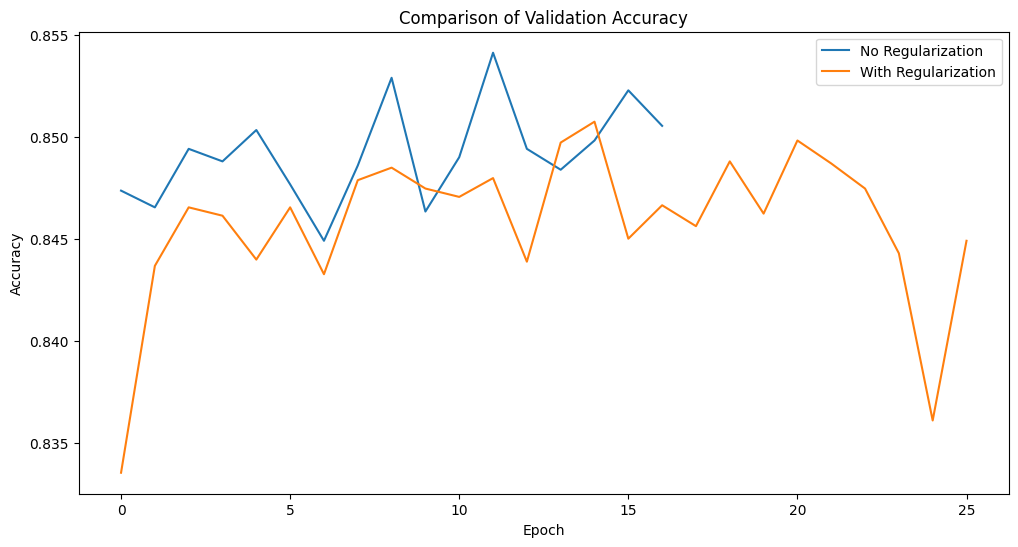

In [21]:
# Compare the two models
plt.figure(figsize=(12, 6))
plt.plot(history_no_reg.history['val_accuracy'], label='No Regularization')
plt.plot(history_with_reg.history['val_accuracy'], label='With Regularization')
plt.title('Comparison of Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

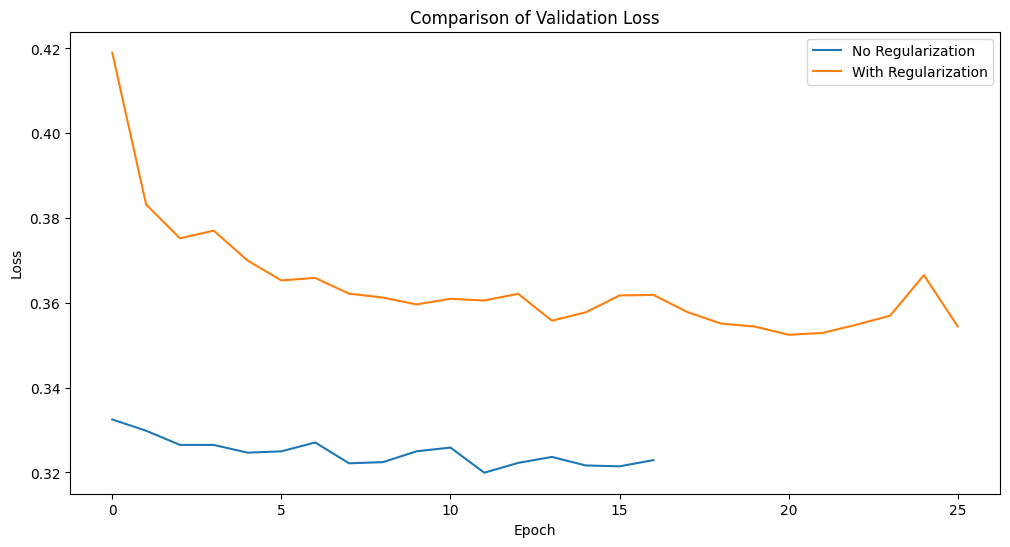

In [22]:
# Compare loss
plt.figure(figsize=(12, 6))
plt.plot(history_no_reg.history['val_loss'], label='No Regularization')
plt.plot(history_with_reg.history['val_loss'], label='With Regularization')
plt.title('Comparison of Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()